# Making Decisions under Uncertainty

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import pymc3 as pm
import theano.tensor as tt
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
with pm.Model() as generative_model:
    #θ = pm.Beta('θ', alpha=5, beta=5, shape=20)
    ψ_hyper = pm.HalfNormal('ψ_hyper', sd=10.)
    ψ = pm.HalfNormal('ψ', sd=ψ_hyper, shape=20)
    s = pm.Poisson('suppliers', mu=ψ,# theta=θ, 
                   shape=(1000, 20))
    
    gen_data = pm.sample_prior_predictive(samples=1)

In [80]:
def to_tidy(x):
    df = pd.DataFrame(x)
    return (df.stack()
            .reset_index(level=0, drop=True)
            .to_frame()
            .reset_index()
            .rename(columns={'index': 'supplier', 0: 'shipments'})
           )

In [81]:
supplier_data = to_tidy(gen_data['suppliers'])

/Users/twiecki/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


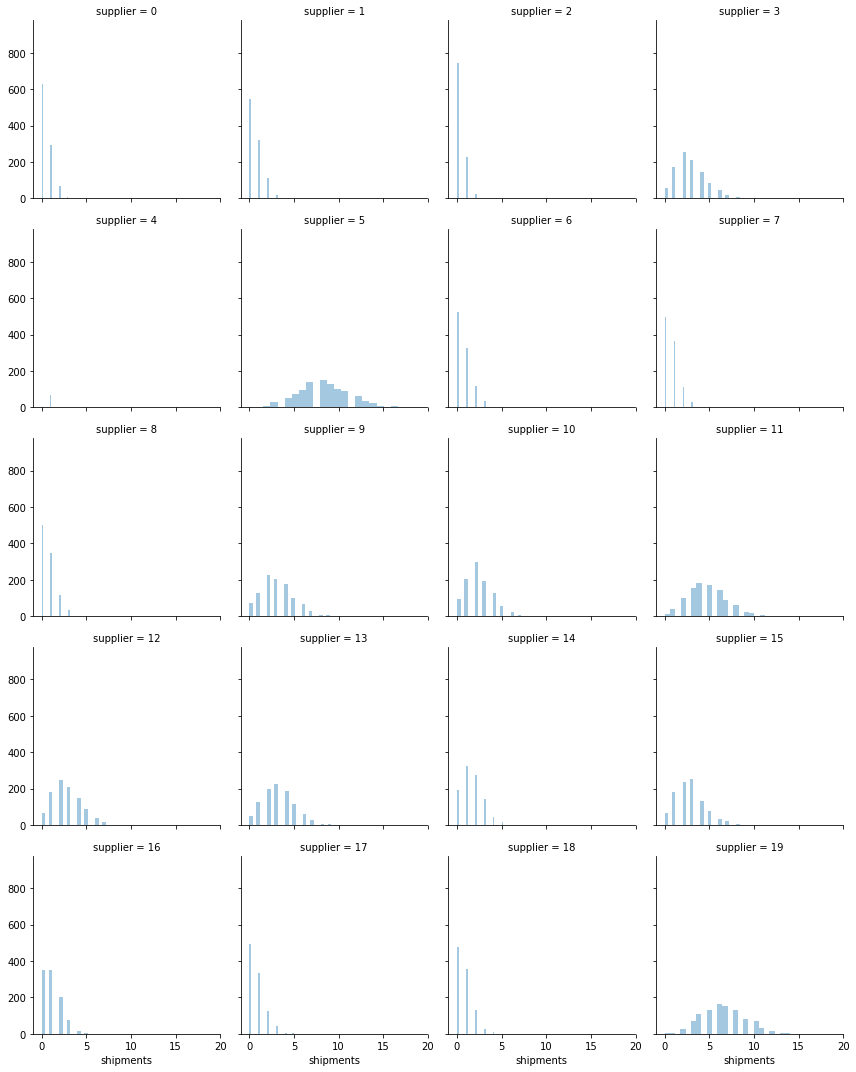

In [82]:
g = sns.FacetGrid(supplier_data, col='supplier', col_wrap=4)
g.map(sns.distplot, 'shipments', kde=False)

In [88]:
with pm.Model() as generative_model:
    ψ_hyper = pm.HalfNormal('ψ_hyper', sd=10.)
    ψ = pm.HalfNormal('ψ', sd=ψ_hyper, shape=20)
    s = pm.Poisson('suppliers', mu=ψ, observed=gen_data['suppliers'])
    
    trace = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [ψ, ψ_hyper]
Sampling 2 chains: 100%|██████████| 2000/2000 [00:07<00:00, 271.61draws/s]
/Users/twiecki/anaconda3/lib/python3.6/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


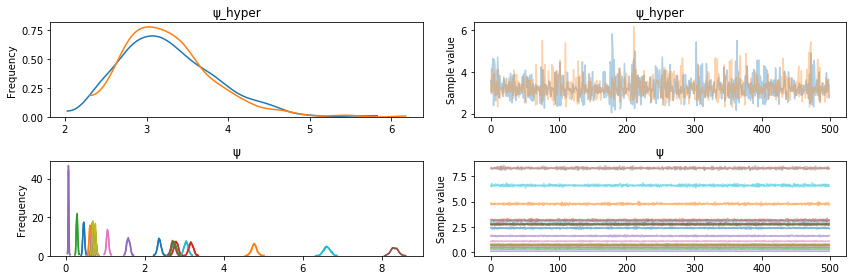

In [93]:
pm.traceplot(trace);

In [92]:
prices = np.random.randn(20) * 500 + 1000
prices

array([ 628.3448967 , 1469.46305541,  760.45342414,  699.62643047,
        440.15105396, 1733.18189214,  589.38982407,  883.34477454,
        162.79590588, 1072.60253562, 1395.09574588, 1405.54426394,
        779.00422502, 1989.25672234, 1249.07112501, 1511.04807466,
        890.48285197,  433.7025785 ,  740.20252419,  468.0451669 ])

In [ ]:
def objective(target):
    